In [1]:
%pylab inline
from astropy import units
import astropy as apy
from profiles import *
from math import erf

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:758: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


# To do 

1. test for other iniital positions! and for all the models! 
2. Dynamical Friction
3. Allow the MW to move due to the LMC! 

In [8]:
G = apy.constants.G
G = G.to(units.kpc**3 / units.Msun / units.s**2)
print G
M = 1E12
a = 10.0
Gyr = 1E9 * 365.25 * 24 * 60 * 60
print Gyr

4.51835939627e-39 kpc3 / (s2 solMass)
3.15576e+16


In [9]:
x_ic = 40.0 #kpc
y_ic = 0.0
z_ic = 10.0
v1 = vc_hernquist(0.7, x_ic, y_ic, z_ic, 1E10) 
v2 = vc_mn(6.5, 0.6, x_ic, y_ic, z_ic, 5.5E10) # a, b, z, r, M
v3 = vc_NFW(11.0, x_ic, y_ic, z_ic, 1E12)

print v1, v2, v3
v_ic = np.sqrt(v1**2 + v2**2 + v3**2)
v_ic = v_ic.to(units.kpc / units.Gyr) #/ np.sqrt(G*M)

print v_ic
print v_ic.value

31.7626960858 km / s 68.3448982096 km / s 196.48237618 km / s
215.22009359 kpc / Gyr
215.22009359


In [10]:
def acceleration(x, y, z):
    M_bulge = 1E10
    M_disk = 5.5E10
    M_halo = 1E12
    abulge = a_hernquist(0.7, x, y, z, M_bulge)
    adisk = a_mn(6.5, 0.6, x, y, z, M_disk)
    ahalo = a_NFW(11.0, x, y, z, M_halo)
    #print abulge, adisk, ahalo
    ax = abulge[0] + adisk[0] + ahalo[0]
    ay = abulge[1] + adisk[1] + ahalo[1]
    az = abulge[2] + adisk[2] + ahalo[2]
    ax = ax.to(units.kpc/units.Gyr**2) # / G.value / M_bulge
    ay = ay.to(units.kpc/units.Gyr**2) #/ G.value / M_bulge
    az = az.to(units.kpc/units.Gyr**2) #/ G.value / M_bulge
    return ax.value, ay.value, az.value

In [11]:
def accelerationB(x, y, z):
    M_bulge = 1E10
    M_disk = 5.5E10
    M_halo = 1E12
    #abulge = a_hernquist(0.7, x, y, z, M_bulge) 
    #adisk = a_mn(6.5, 0.6, x, y, z, M_disk)
    ahalo = a_NFW(11.0, x, y, z, M_halo)
    ax = ahalo[0].to(units.kpc/units.Gyr**2) # / G.value / M_bulge
    ay = ahalo[1].to(units.kpc/units.Gyr**2) #/ G.value / M_bulge
    az = ahalo[2].to(units.kpc/units.Gyr**2) #/ G.value / M_bulge
    return ax.value, ay.value, az.value
acceleration(10, 0, 0)

(-4194.368897961808, -0.0, -0.0)

In [12]:
n_points = 3000
h = 0.001

t = zeros(n_points)

x = zeros(n_points)
y = zeros(n_points)
z = zeros(n_points)

vx = zeros(n_points)
vy = zeros(n_points)
vz = zeros(n_points)


ax = zeros(n_points)
ay = zeros(n_points)
az = zeros(n_points)

t[0] = 0

x[0] = x_ic # Distance 
y[0] = y_ic # Distance 
z[0] = z_ic
# Distance 

vx[0] = 0.0 #v_ic.value # velocity 
vy[0] = v_ic.value #v_ic.value #v_ic.value # velocity 
vz[0] = 0.0 # velocity 

ax[0] = acceleration(x[0], y[0], z[0])[0]
ay[0] = acceleration(x[0], y[0], z[0])[1]
az[0] = acceleration(x[0], y[0], z[0])[2]

t[1] = t[0] + h
x[1] = x[0] + h * vx[0]
y[1] = y[0] + h * vy[0]
z[1] = z[0] + h * vz[0]

vx[1] = vx[0] + h*acceleration(x[0], y[0], z[0])[0]
vy[1] = vy[0] + h*acceleration(x[0], y[0], z[0])[1]
vz[1] = vz[0] + h*acceleration(x[0], y[0], z[0])[2]

ax[1] = acceleration(x[1],y[1], z[1])[0]
ay[1] = acceleration(x[1],y[1], z[1])[1]
az[1] = acceleration(x[1],y[1], z[1])[2]

for i in range(2,n_points):
    t[i] = t[i-1] + h
    
    x[i] = x[i-2] + 2 * h * vx[i-1]
    y[i] = y[i-2] + 2 * h * vy[i-1]
    z[i] = z[i-2] + 2 * h * vz[i-1]

    vx[i] = vx[i-2] + 2 * h * acceleration(x[i-1], y[i-1], z[i-1])[0]
    vy[i] = vy[i-2] + 2 * h * acceleration(x[i-1], y[i-1], z[i-1])[1]
    vz[i] = vz[i-2] + 2 * h * acceleration(x[i-1], y[i-1], z[i-1])[2]

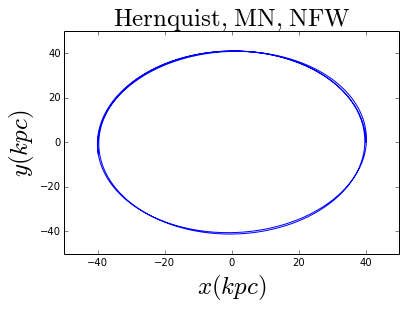

In [13]:
plot(x, y)
title(r'$\mathrm{Hernquist,\ MN,\ NFW}$', fontsize=25)
xlabel('$x(kpc)$', fontsize=25)
ylabel('$y(kpc)$', fontsize=25)
savefig('MWvc.png')

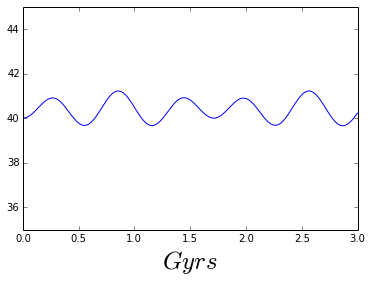

In [14]:
plot(t, np.sqrt(x**2+y**2))
plt.ylim(35, 45)
plt.xlabel('$Gyrs$', fontsize=25)